# Homework 4: Data Visualization
- **Name**:  Lohith Prasanna Teja Kakumanu
- **UB Username**: lohithpr
- **UB Person Number**:  50541137

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

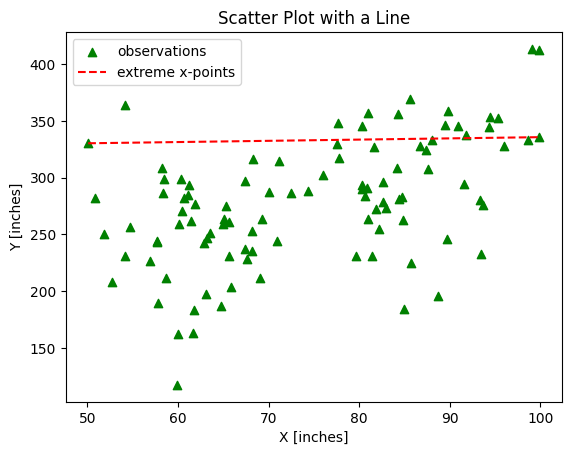

In [1]:
# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...
import pandas as pd
import matplotlib.pyplot as plt
# Load data from the CSV file excluding commented records and then adding 
df = pd.read_csv("scatter_data.csv", comment="%",header=None, names=['x', 'y'])
df.head()
x=df['x']
y=df['y']
plt.scatter(df['x'], df['y'], color='green', marker='^', label='Data Points')
plt.plot([min(df['x']), max(df['x'])], [y[x.idxmin()], y[x.idxmax()]], 'r--', label='Line')
plt.title('Scatter Plot with a Line')
plt.xlabel('X [inches]')
plt.ylabel('Y [inches]')

# Add a legend
plt.legend(['observations','extreme x-points'])

# Display the plot
plt.show()

In [ ]:
# It's OK to break up your code into multiple cells.

### Problem 2 - Histogram

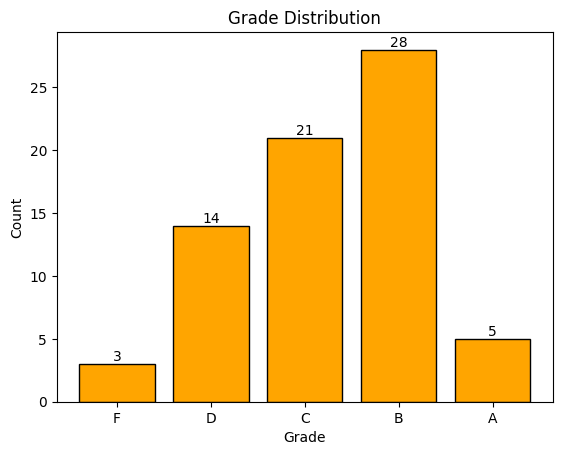

In [2]:
# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...
import pandas as pd
import matplotlib.pyplot as plt

# (a) Load data from the CSV file, ignoring comments
data = pd.read_csv("student_grades.csv", comment="%", header=None, names=['Student ID', 'Average Score'])

# (b) Count the number of students in each grade category
score_bins = [0, 60, 70, 80, 90, 100]  # Adjust the upper limit for the "A" grade
bin_labels = ['F', 'D', 'C', 'B', 'A']

grade_counts = [((data['Average Score'] >= score_bins[i]) & (data['Average Score'] < score_bins[i+1])).sum() for i in range(len(score_bins)-1)]

# (c) Create a bar plot
plt.bar(bin_labels, grade_counts, color='orange', edgecolor='black')

# (d) Display the counts above each bar
for i, count in enumerate(grade_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# (e) Label the x- and y-axes
plt.xlabel('Grade')
plt.ylabel('Count')

# (f) Add a title for the histogram
plt.title('Grade Distribution')

# Display the bar plot
plt.show()


In [ ]:
# It's OK to break up your code into multiple cells.

### Problem 3 - Barplot and Boxplot in the Same Figure

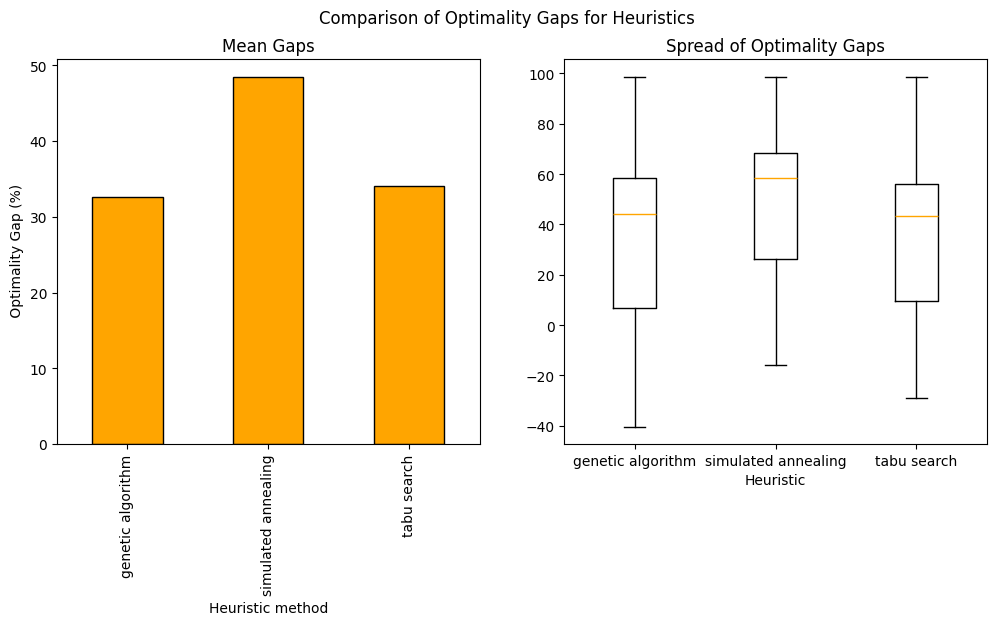

In [4]:
# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...
import pandas as pd
import matplotlib.pyplot as plt

# (a) Load data from the CSV file, ignoring comments
data = pd.read_csv("solution_data.csv", comment="%", header=None, names=['Problem ID', 'Solution Approach', 'OFV'])

# (b) Calculate optimality gaps
optimal_OFV = data[data['Solution Approach'] == 'optimal']['OFV'].mean()
data['Optimality Gap'] = ((optimal_OFV - data['OFV']) / optimal_OFV) * 100
data = data[data['Solution Approach'] != 'optimal']
# Create a single figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Set the figure title
fig.suptitle("Comparison of Optimality Gaps for Heuristics")

# (i) Barplot for average optimality gaps
average_gaps = data.groupby('Solution Approach')['Optimality Gap'].mean()
average_gaps.plot(kind='bar', ax=axes[0], color='orange', edgecolor='black')
axes[0].set_xlabel('Heuristic method')
axes[0].set_ylabel(' Optimality Gap (%)')
axes[0].set_title('Mean Gaps')

# (ii) Boxplot for spread of optimality gaps
boxplot_data = [data[data['Solution Approach'] == approach]['Optimality Gap'] for approach in data['Solution Approach'].unique()]
axes[1].boxplot(boxplot_data, labels=data['Solution Approach'].unique(), medianprops={'color': 'orange'})
axes[1].set_xlabel('Heuristic')
axes[1].set_title('Spread of Optimality Gaps')

# Set the y-axis scale to be the same for both subplots
axes[1].set_ylim(axes[1].get_ylim())

# Display the figure
plt.show()


In [ ]:
# It's OK to break up your code into multiple cells.

--- 
## Part 2 - Explore New Plot Types

[In this space, provide a concise explanation of your plot.  The reader should be able to read this to learn what kind of plot you're about to create, what type of data you're going to plot, and why you believe it is wise to use this type of plot for this type of data.  (replace these instructions with your actual content, and remove the brackets)]

- **URL of Example Code**:  https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/
- **URL of Sample Data**: https://www.kaggle.com/datasets/larsen0966/penguins

In [54]:
# Use "Code" cells to create your plots 
# ...
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the MovieLens dataset (adjust the file path as needed)
#df1= pd.read_csv("penguins.csv")
df2= pd.read_csv("tips.csv")


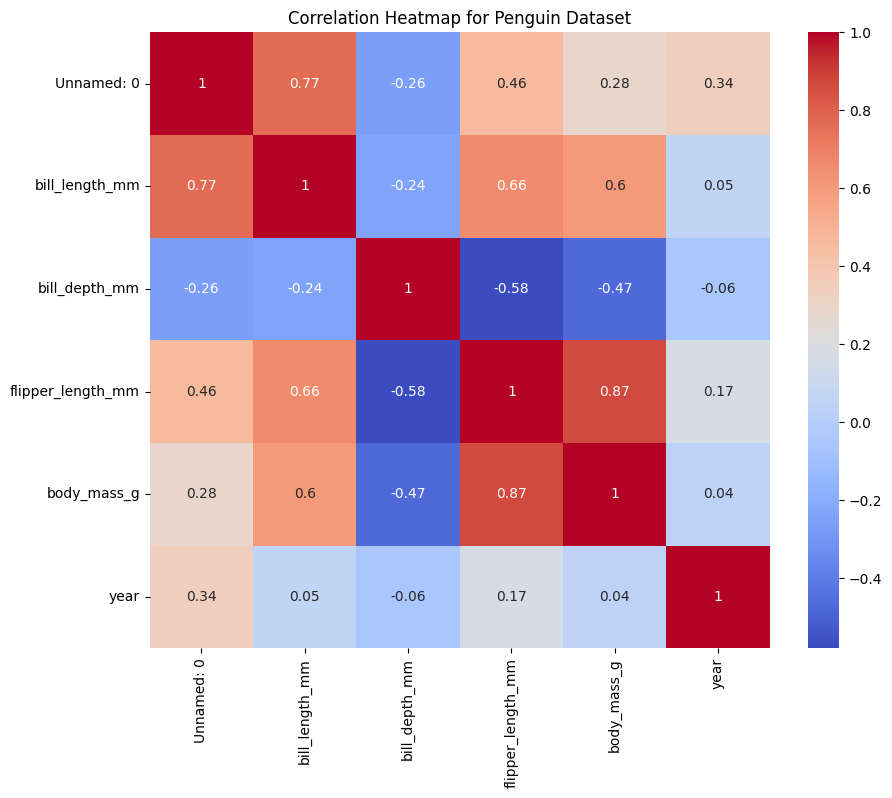

In [57]:
# It's OK to break up your code into multiple cells.
df1.head()
numerical_data = df1.select_dtypes(include='number')
correlation_matrix = numerical_data.corr().round(2)

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Penguin Dataset")
plt.show()

#generally the correlation ranges from -1 to 1 where -1 is negatively correlated and +1 is positively correlated. 
# In the below heatmap the dark brown color idicate the correlation value as 1 and the dark blue to be as -1


In [3]:

# 1.The strongest correlation is observed between flipper length and body mass (0.87), indicating a close relationship between these two measurements.
# 2. Another strong positive correlation exists between bill depth and flipper length (0.66)
# , suggesting that these measurements may be related to the same underlying biological process.
# 3. The correlation between body mass and year is the weakest (0.04), indicating that there is a negligible relationship between these two variables.
# 4. The correlation between body mass and bill depth is the strong but negatively correlated (-0.47), 


# Code Explanation:
df1.head(): This line doesn't have any effect on the heatmap generation; it's just a way to display the first few rows of the DataFrame df1 to inspect its contents. It's often used for data exploration.

numerical_data = df1.select_dtypes(include='number'): This line selects only the numerical columns from the DataFrame df1. The select_dtypes function is used to filter columns based on their data types. In this case, it includes columns that have a data type of "number," which includes integer and float columns. This step is important for creating a correlation matrix because correlations are typically calculated between numerical variables.

correlation_matrix = numerical_data.corr().round(2): This line calculates the correlation matrix for the selected numerical columns in numerical_data. The .corr() function computes pairwise correlations between these columns. The .round(2) function rounds the correlation values to two decimal places for better readability.

plt.figure(figsize=(10, 8)): This line sets the size of the figure in which the heatmap will be displayed. The figsize parameter specifies the width and height of the figure in inches.

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm"): This line creates the heatmap using Seaborn's heatmap function. It takes the correlation_matrix as input and annotates the cells with the correlation values (as specified by annot=True). The color map "coolwarm" is used to represent the correlations.

plt.title("Correlation Heatmap for Penguin Dataset"): This line sets the title for the heatmap.

plt.show(): This line displays the heatmap in the Matplotlib window.

 

# 1.The strongest correlation is observed between flipper length and body mass (0.87), indicating a close relationship between these two measurements.
# 2. Another strong positive correlation exists between bill depth and flipper length (0.66)
# , suggesting that these measurements may be related to the same underlying biological process.
# 3. The correlation between body mass and year is the weakest (0.04), indicating that there is a negligible relationship between these two variables.
# 4. The correlation between body mass and bill depth is the strong but negatively correlated (-0.47), 
